# NLP Challenge: Twitter Sentiment Analysis

In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import re
from wordcloud import WordCloud


In [83]:
# Import the machine learning model of your choice
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Step 1: Load the Sentiment140 dataset

In [84]:
# Download the dataset from Kaggle and specify the file path
file_path = 'sentiment140_tweet_dataset.csv'
tweets_data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
tweets_df = pd.DataFrame(tweets_data)

# Step 2: Data Preprocessing

In [85]:
# Clean the text data, remove special characters, handle missing values, etc.
tweets_df.columns = ['Sentiment', 'ID', 'Date-Time', 'Query', 'Username', 'Tweet']
tweets_df.drop(['ID', 'Date-Time', 'Query', 'Username'], axis=1, inplace=True)
tweets_df.dropna(inplace=True)


In [86]:
def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+', '', tweet)
    tweet = re.sub('http[^\s]+', '', tweet)
    return tweet

tweets_df['Tweet'] = tweets_df['Tweet'].apply(lambda x: remove_usernames_links(x))
tweets_df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_23049/1009556566.py:2: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub('@[^\s]+', '', tweet)
/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_23049/1009556566.py:3: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub('http[^\s]+', '', tweet)


,Sentiment,Tweet
0,0,"- Awww, that's a bummer. You shoulda got Da..."
1,0,is upset that he can't update his Facebook by ...
2,0,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [87]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    # Tokenize the tweet
    tokens = word_tokenize(tweet.lower())
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    clean_tweet = ' '.join(tokens)
    return clean_tweet

tweets_df['Sentiment'] = tweets_df['Sentiment'].apply(lambda x: 1 if x > 0 else 0)

tweets_df['Tweet'] = tweets_df['Tweet'].apply(lambda x: clean_tweet(x))

In [88]:
tweets_df

,Sentiment,Tweet
0,0,awww bummer shoulda got david carr third day
1,0,upset ca update facebook texting might cry res...
2,0,dived many time ball managed save rest go bound
3,0,whole body feel itchy like fire
4,0,behaving mad ca see
...,...,...
1599995,1,woke school best feeling ever
1599996,1,cool hear old walt interview
1599997,1,ready mojo makeover ask detail
1599998,1,happy birthday boo alll time tupac amaru shakur


# Step 3: Feature Extraction

In [89]:
# Choose a feature extraction method (e.g., TF-IDF, Gensim, or a pretrained language model) and transform the text data into numerical features.

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(tweets_df['Tweet'])
y = tweets_df['Sentiment']

# Step 4: Model Selection and Training

In [90]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression) and train it
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 5: Sentiment Analysis

In [91]:
# Perform sentiment analysis on the dataset using your trained model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(cm)

Accuracy: 0.765309375
[[117441  42053]
 [ 33048 127458]]


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           1       0.75      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



# Step 6: Visualizations

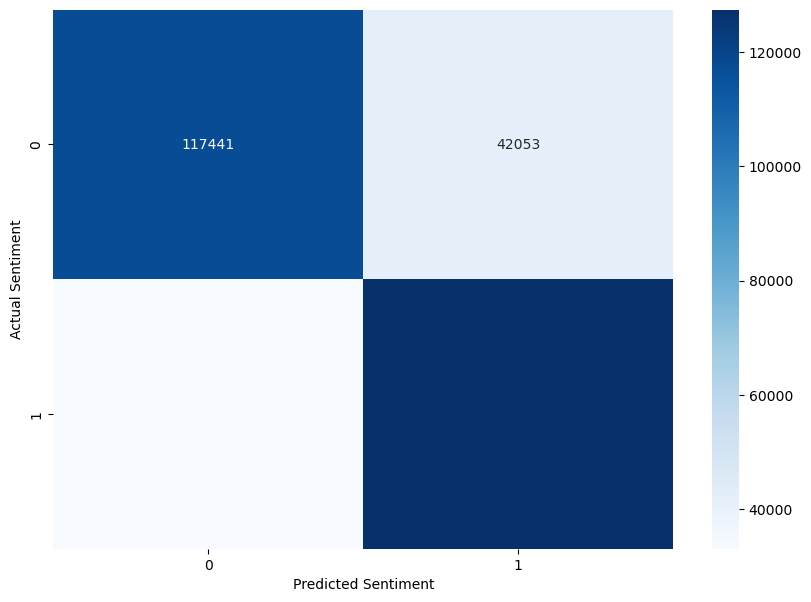

In [93]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Step 7: Company Sentiment Analysis

In [ ]:
# Select an AI company or product of your choice and collect tweets related to it
# Use your trained model to predict sentiment on these tweets
# Create visualizations to showcase sentiment (e.g., bar charts, word clouds)

In [94]:
microsoft_tweets = tweets_df[tweets_df['Tweet'].str.contains('microsoft', case=False, regex=False)]
microsoft_tweets

,Sentiment,Tweet
962,0,xbox show three red light mean dead need fixed...
3049,0,still stuck microsoft specialist wo day ever end
3449,0,dontcha love microsoft corrupted open xml docu...
17910,0,microsoft office update taking forever install...
27095,0,gone done yet another microsoft app mac
...,...,...
1581579,1,must inside microsoft firewall
1587824,1,microsoft sharepoint evangelism
1595515,1,yep turned along microsoft point shopto
1596063,1,microsoft scripting game quietly dropping perl...


In [105]:
X_test = tfidf_vectorizer.transform(microsoft_tweets['Tweet'])
y_test = microsoft_tweets['Sentiment']
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ms_cm = confusion_matrix(y_test, y_pred)

print("Microsoft Sentiment Accuracy:", accuracy)
print('\n')
print(ms_cm)

Microsoft Sentiment Accuracy: 0.7287128712871287


[[153  89]
 [ 48 215]]


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       242
           1       0.71      0.82      0.76       263

    accuracy                           0.73       505
   macro avg       0.73      0.72      0.72       505
weighted avg       0.73      0.73      0.73       505



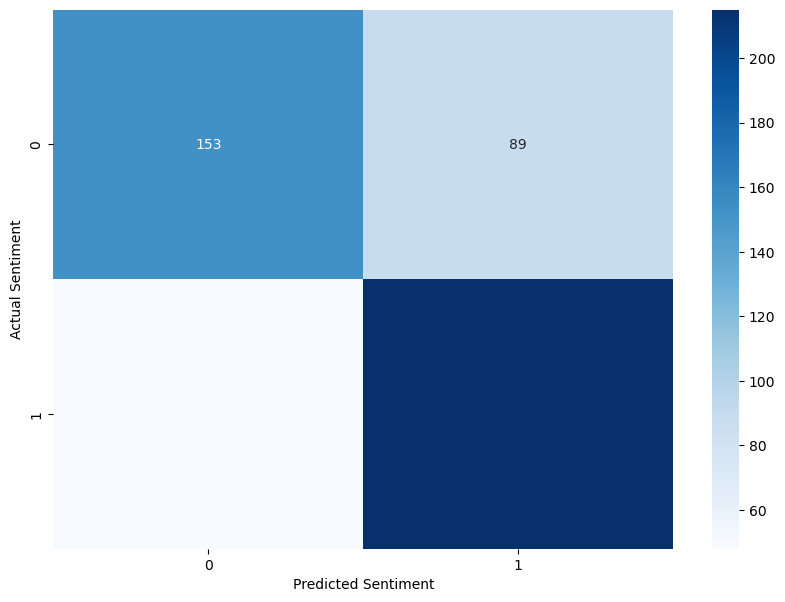

In [106]:
def heatmap(cm):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('Actual Sentiment')
    plt.show()

heatmap(ms_cm)

In [102]:
positive_ms_tweets = tweets_df[tweets_df['Sentiment'] == 1]['Tweet']
negative_ms_tweets = tweets_df[tweets_df['Sentiment'] == 0]['Tweet']

positive_ms_text = " ".join(positive_ms_tweets)
negative_ms_text = " ".join(negative_ms_tweets)

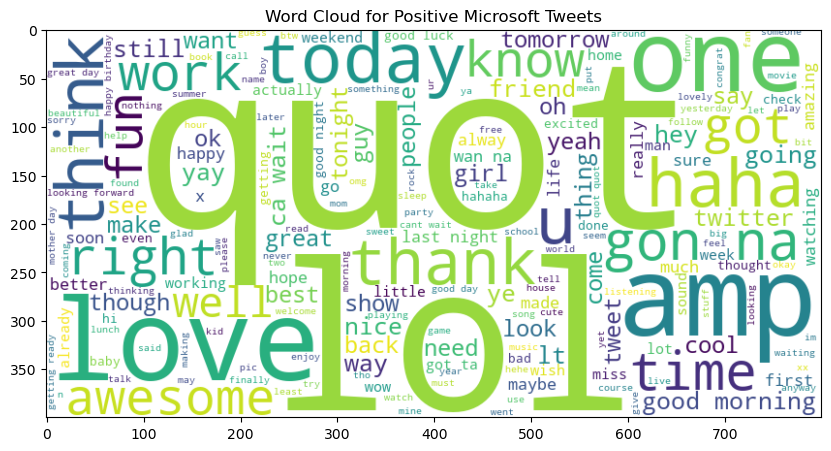

In [103]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis=('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_ms_text, 'Word Cloud for Positive Microsoft Tweets', )

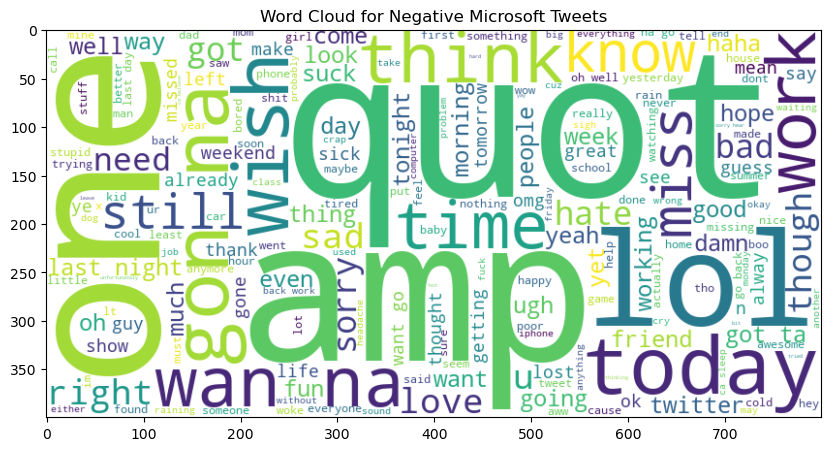

In [104]:
generate_wordcloud(negative_ms_text, 'Word Cloud for Negative Microsoft Tweets')

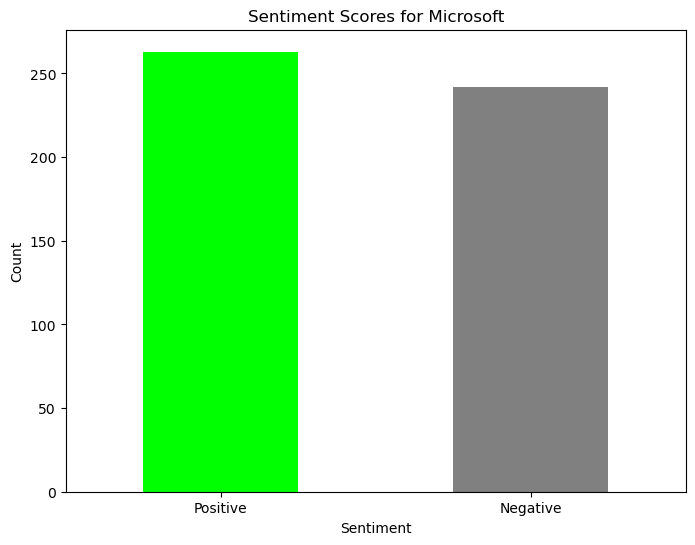

In [111]:
sentiment_counts = microsoft_tweets['Sentiment'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['lime', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Scores for Microsoft')
plt.xticks([0, 1], ['Positive', 'Negative'], rotation=0)
plt.show()

# Step 8: Model Evaluation

In [113]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

X = microsoft_tweets['Tweet']
y = microsoft_tweets['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

steps = [
    ('tfidf', TfidfVectorizer()),  # Text vectorization
    ('svm', SVC(kernel='linear'))  # SVM classifier with a linear kernel
]

# Create the Pipelineand train the model
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC(kernel='linear'))])

In [114]:
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6237623762376238


In [115]:
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__gamma': ['scale', 'auto'],  # 'scale' and 'auto' are good defaults for gamma
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Evaluate the best model found by GridSearchCV
accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Test Accuracy: 0.6237623762376238
Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'tfidf__max_df': 1.0, 'tfidf__ngram_range': (1, 1)}


---